<font size=7>LFP Animations

This notebook explains how to create animations of the raw waveforms from various tissue recordings. These animations allow us to see the wave patterns flow through various parts of the tissue. For this tutorial we will consider the ?anterior? CA1 recording (UUID: 2023-04-02-e-hc328_unperturbed). I reccomned creating a new notebook for each dataset you choose to analyze.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import pickle

from human_hip.lfp import get_brain_waves
from human_hip.spike_data import raster_fancy_plot, read_phy_files

# <font color="blue"> Data Overview

We load the spike data in order to inspect the portion of th recording that will will analyze. From the raw data file name, `raw_start120s_stop130s_fs1ms.pkl`, we see that the recording goes from 120-130 seconds. Looking at the raster, we see that the most activity is between 122-125 seconds, thus we will create our animation there.

In [2]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


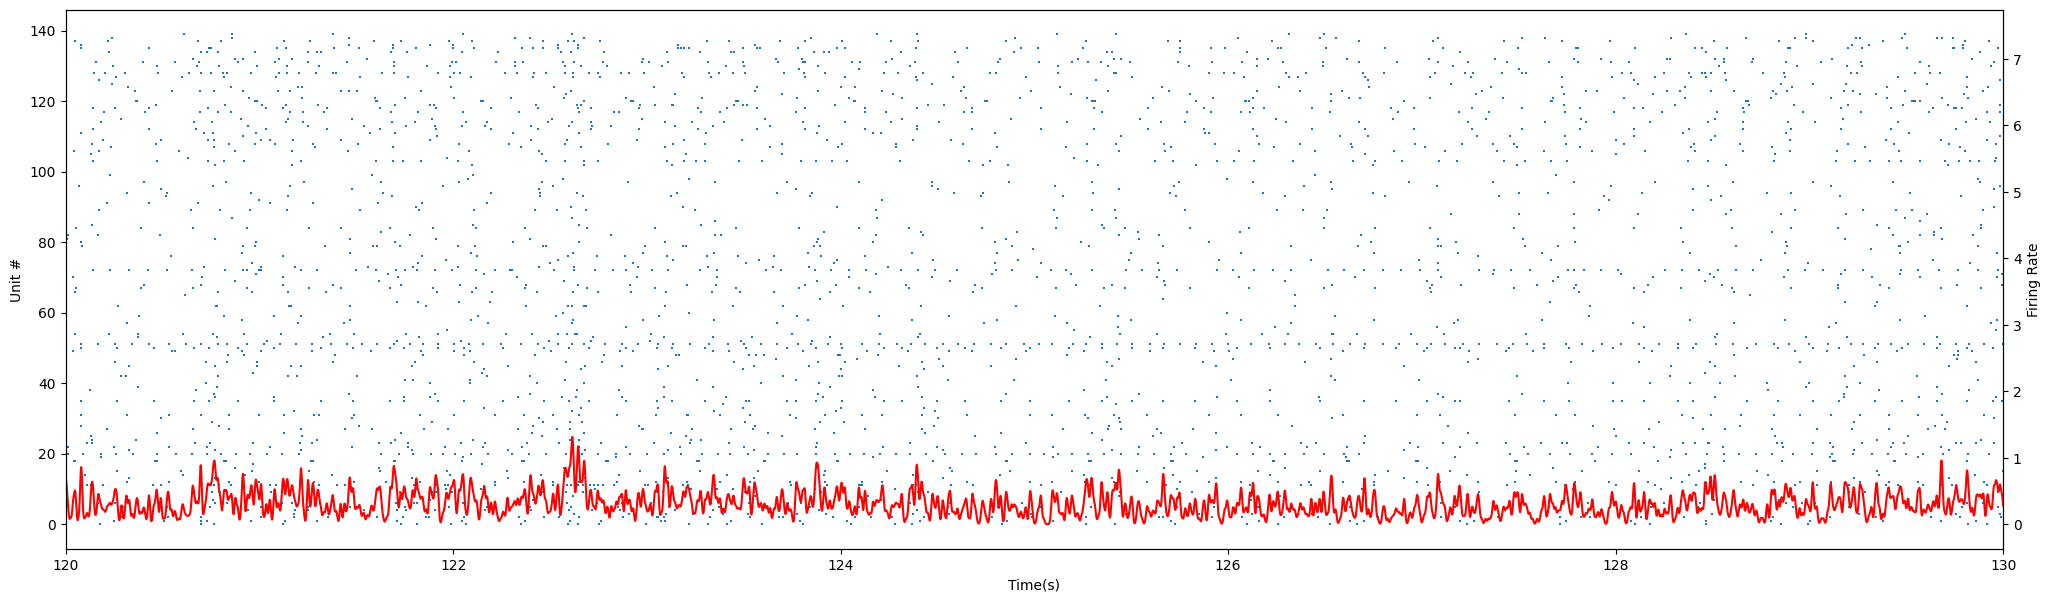

In [3]:
raster_fancy_plot(sd, xsize=25, ysize=7, start_time=120, stop_time=130)

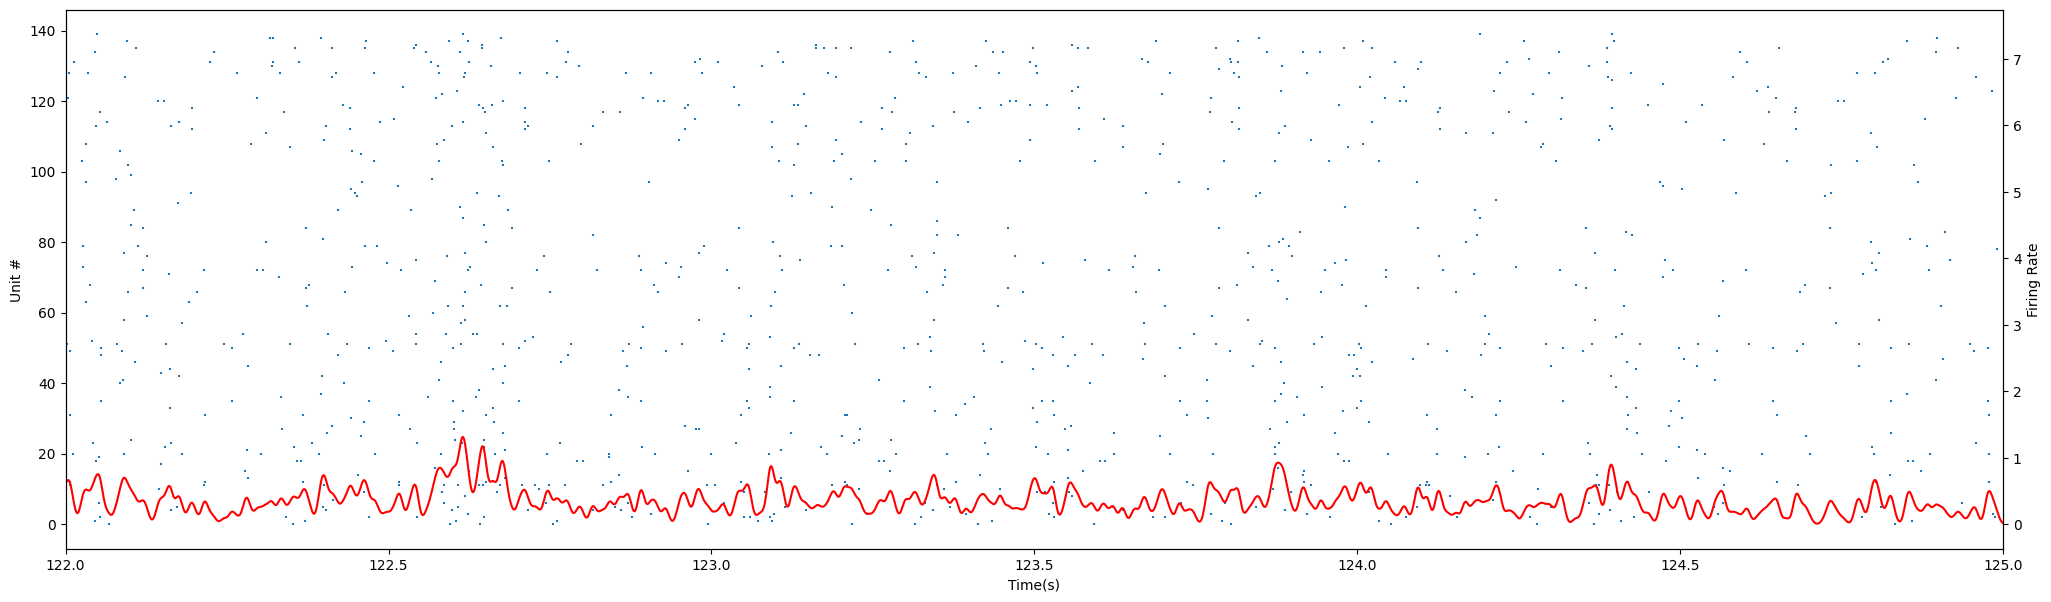

In [4]:
raster_fancy_plot(sd, xsize=25, ysize=7, start_time=122, stop_time=125)

Next we load in the raw data. We can look at the electrode map of the dataset.

In [5]:
# load raw data
file = open("/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl", 'rb')
data_pkl = pickle.load(file)
file.close()

data_pkl.keys()

dict_keys(['data', 'xy', 'frame_rate'])

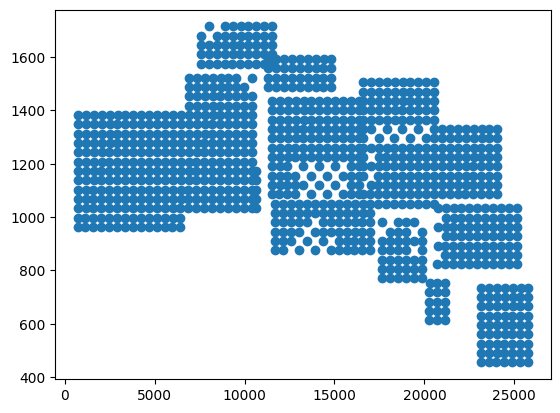

In [6]:
x = data_pkl['xy'][:,0]                                             # x and y  coordinates
y = data_pkl['xy'][:,1]
plt.scatter( x , y )

We use the function `get_brain_waves` to look at the various frequencies that neuroscientists care about. See `2_basic_analysis` for a more thorough description of this. Below we plot a few arbitrarily chosen electrodes at a specific frequency. I reccomend changing the code to see what different frequencies look like. Then you can decided what frequency band and time window you'd like to use for animations.

In [7]:
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

(972, 10000)
0


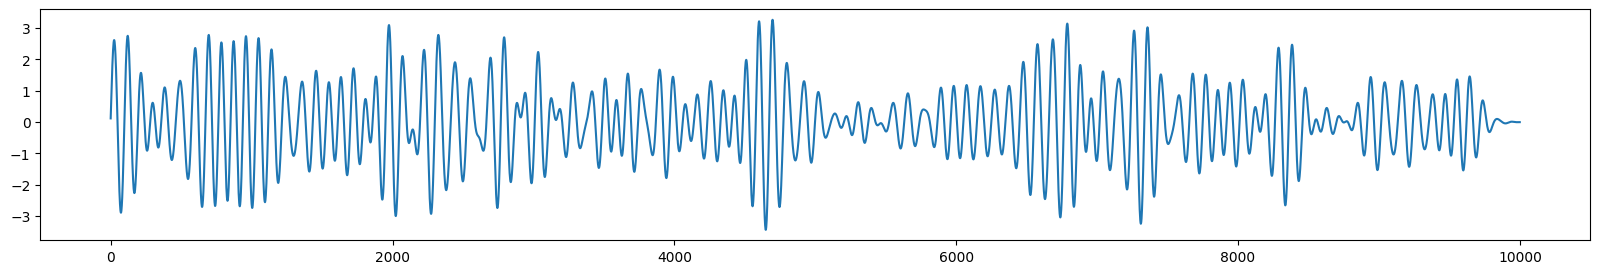

100


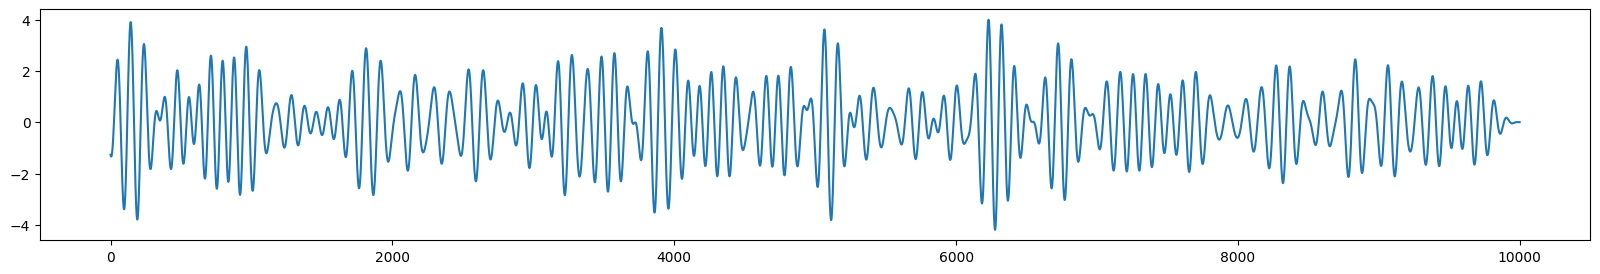

200


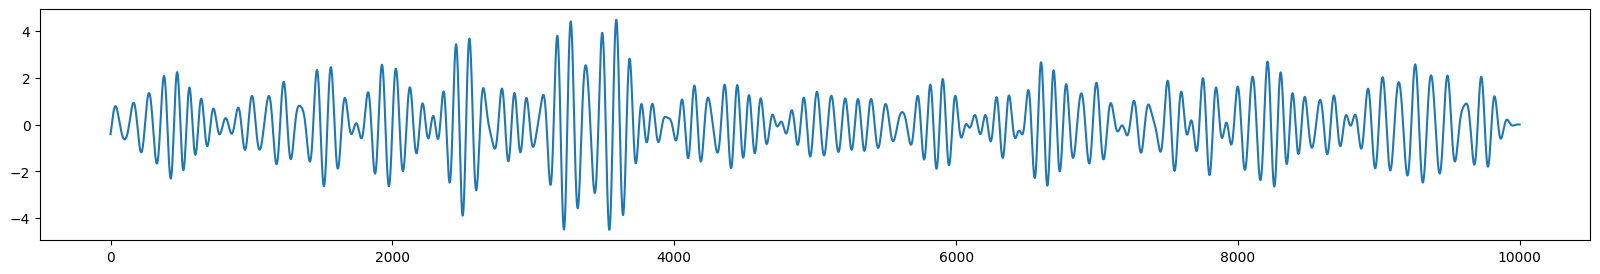

300


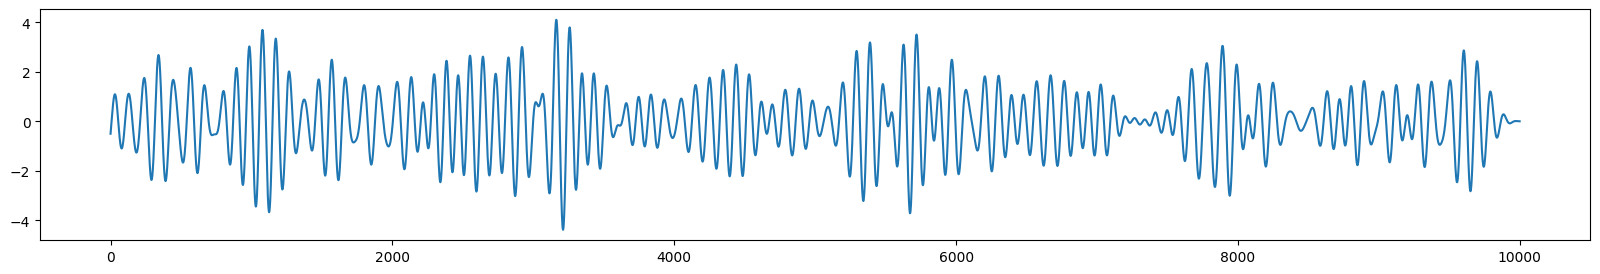

400


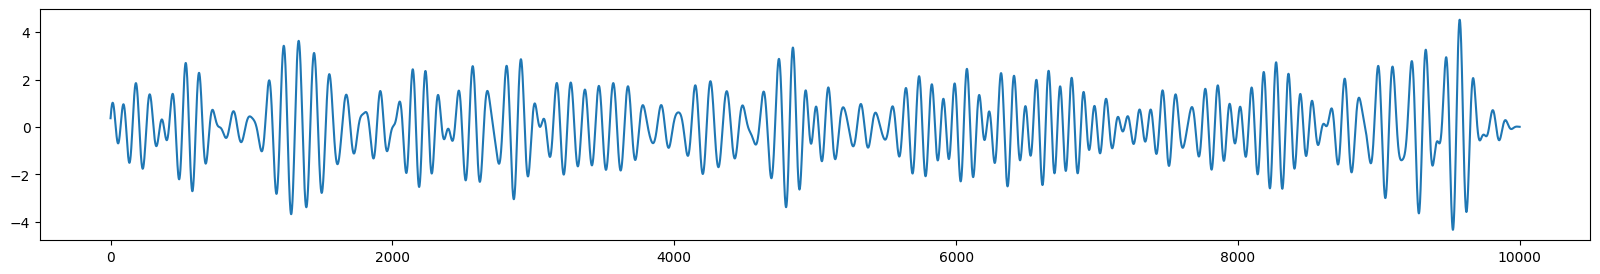

500


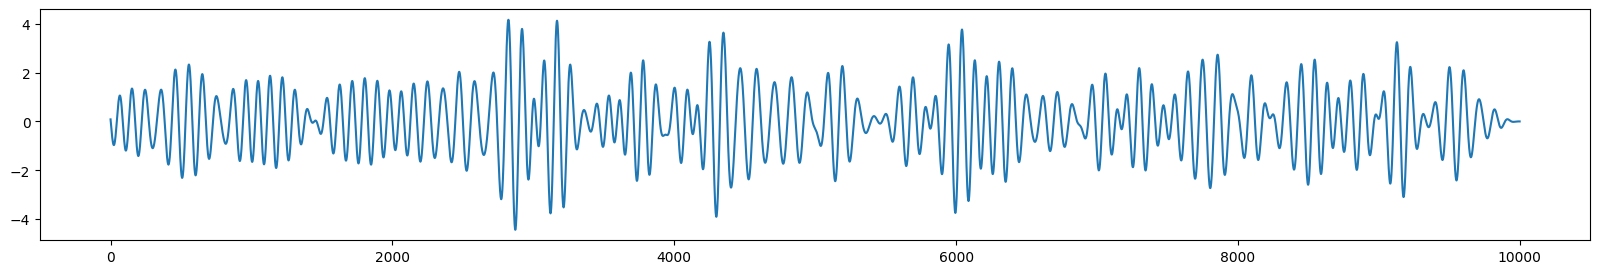

In [8]:
# plot scatter of the "basic" frequency of 6 electrodes
print(waves["basic"].shape)
for i in range(0,600,100):
    print(i)
    plt.figure(figsize=(20,3))
    plt.plot( [*range(waves["basic"].shape[1])], waves["alpha"][i,:] )
    plt.show()
    #plt.xlim(2000,3000)

# <font color="blue"> Animations

## <font color="blue"> Waveform Animations

This example shows how to create a plot 2D layout of the theta waves travelling across the electrodes. The color of the circle states whether the waveform for the electrode at that particular moment is positive or negative. The size of the circle states depicts the amplitude at that timetpoint. In the example below we look at alpha waves.

[reference code](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/) on creating animations

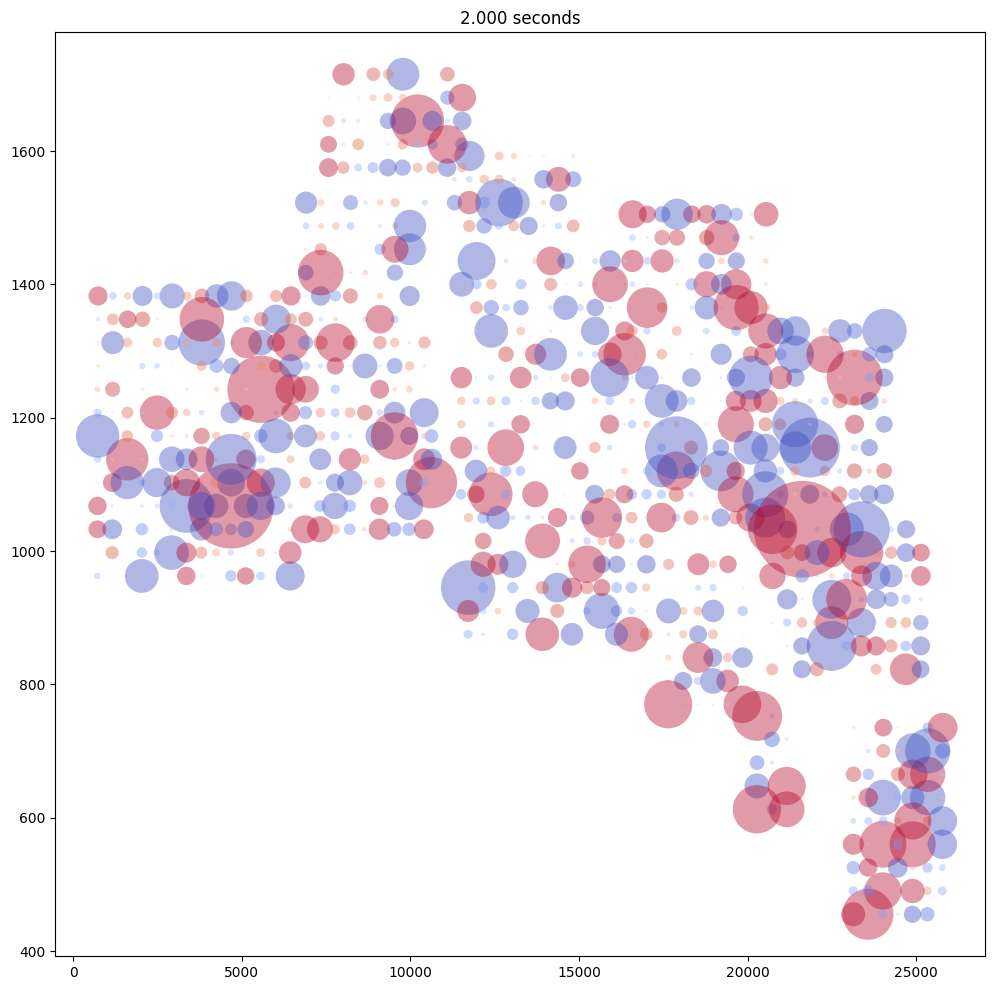

In [9]:
### Long Alpha Animation
fig = plt.figure( figsize=(12,12) )           # Determine the size of the figure
ax = plt.axes()                               # get axis element to later create plot
data = waves["alpha"]                         # Get the alpha wave dataset for plotting
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) ) # norm determines color range for data
# Create scatter plot, 
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 , alpha=.4, edgecolor='none' ) 

# animation function: The i in this function relate to the range in FuncAnimation, shown below
def animate( i ):
    scatter.set_array(data[:,i])   # This changes the value of `c` the color
    scatter._sizes = (np.abs(data[:,i])**2.3)*80  # This changes the size of the datapoints
    ax.set_title(f"{i/1000:.3f} seconds") # We display the current time
    return scatter

# Create animation form data between 2000 and 5000ms, with a step of 3, displaying each plot for 100ms
anim = FuncAnimation(fig, animate, frames=range(2000, 5000, 3), interval=100, blit=False)


In [15]:
anim.save("media/alpha_waves.mp4")

In [11]:
len(range(2000, 5000, 3)) * 100/ 1000

100.0

### <font color="blue"> Saved Examples

These are animations I like

In [ ]:
### Theta Waves Animation ###
## ca1_theta_start2000_stop3000_step3
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["theta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*100 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**1.8)*100
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Delta Waves Animation ###
## ca1_delta_start2000_stop3000_step3
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["delta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**1.8)*20
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Alpha Waves Animation ###
## ca1_alpha_start2500_stop2800_step1
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["alpha"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2)*100
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Beta Waves Animation ###
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["beta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2)*90
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2500, 2800, 1), interval=100, blit=False)

In [ ]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5000_step1
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["alpha"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2.3)*80
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2700, 5000, 3), interval=100, blit=False)  #5700

## <font color="blue"> Multi Plots

Here we plot the waveform in the 2D layout, as show above with another plot depicting when neurons fire. Hopefully we can see a relationship between the two plots.

To start, we make a small spike train that only contains the spikes from neurons within the same time frame as the animation. This make future calculations easier.

In [17]:
start_time = 2000 + 120 * 1000  # start_time is 2000ms into the raw recording which is 120 seconds from the start of the spike recording
end_time = 5000 + 120 * 1000

# make smaller spike train of only spikes in time window
small_train = []
for i_train in sd.train:
    small_train.append( i_train[ (i_train > start_time) & (i_train < end_time) ] )

In [18]:
neurons_by_time = []
for i in range(start_time, end_time):                                   # loop over time
    firing_neurons = []
    for i2 in range(len(small_train)):                                   # loop over neurons
        if len(small_train[i2]) > 0:                                     # if neuron fires at all
            if np.sum( np.abs( small_train[i2] - i ) < 25 ):             # if neuron fires within at least once within 50 ms of time i
                #neuron_x.append( sd.neuron_data[0][i2]['position'][0] )  # add neuron x/y locations to list
                #neuron_y.append( sd.neuron_data[0][i2]['position'][1] )
                firing_neurons.append( i2 )
    neurons_by_time.append( firing_neurons )

In [19]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

/tmp/ipykernel_762/3713121702.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


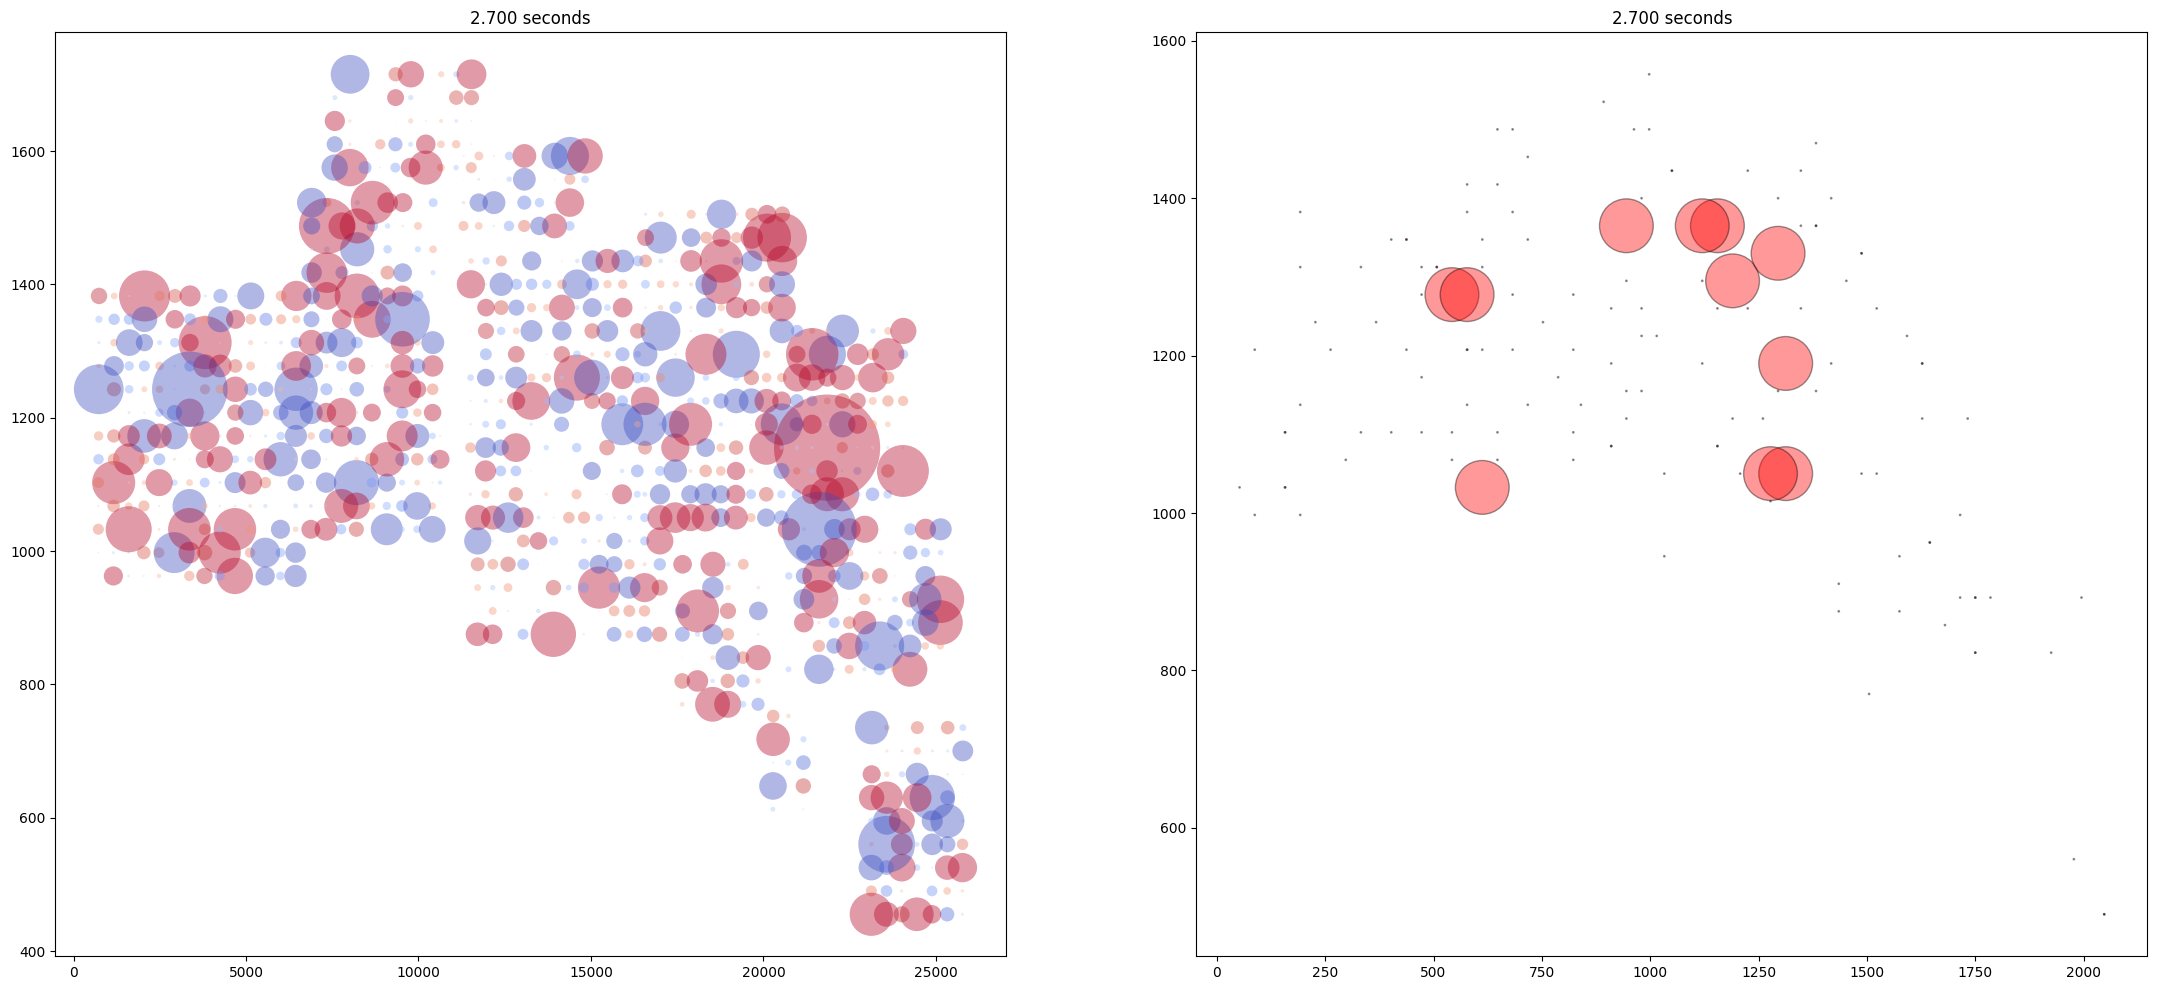

In [20]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5700_step1
# First set up the figure, the axis, and the plot element we want to animate
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))
#ax = plt.axes()

# Waves plot
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
plot0 = plots[0].scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# Footpring plot
plot1 = plots[1].scatter( neuron_y , neuron_x, c="red", s=np.ones(sd.N),  alpha=.4,  edgecolor='black' )

# animation function.  This is called sequentially
def animate(i):
    # Waves plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**2.3)*80
    plots[0].set_title(f"{i/1000:.3f} seconds")
    #plots[0].set_xlim(0,27000)
    #plots[0].set_ylim(400,1800)

    # Raster Plot
    neuron_sizes=  np.ones(sd.N) 
    neuron_sizes[ neurons_by_time[i-2700] ] = 1500
    plot1._sizes = neuron_sizes
    plots[1].set_title(f"{i/1000:.3f} seconds")
    #plots[1].set_xlim(0,27000)
    #plots[1].set_ylim(400,1800)
    return plots

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2700, 3000, 3), interval=100, blit=False)  #5700

In [ ]:
anim.save("media/multiplot.mp4")